In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500

from algorithms.ant_colony import VPR
from tools.data_loader import get_data
from tools.measures import get_all_results

In [6]:
files_A = os.listdir('./data/benchmark/A')
files_A.sort()
files_B = os.listdir('./data/benchmark/B')
files_B.sort()

cases = []
for file in files_A:
    case = get_data('A/' + file)
    if case:
        cases.append(case)
for file in files_B:
    case = get_data('B/' + file)
    if case:
        cases.append(case)

# Лабораторная работа № 5

## Solving Vehicle Routing Problem using  Ant Colony Optimisation (ACO) Algorithm

Выполнили Куклин, Кислицына, Аросланкин.  

**Параметры алгоритма:**  
* ***epochs*** - кол-во эпох (кол-во глобальных обновлений)
* ***n_ants*** - сколько муравьев проходит за одну эпоху
* ***alpha*** - коэффициент влияние феромона
* ***beta*** - коэффициент влияния длины дороги
* ***rho*** - коэффициент роста уровня феромона 
* ***init_pher*** - начальный уровень феромонов

### Работа алгоритма на одном из примеров

In [3]:
np.random.seed(41)
i = 12
case = VPR(cases[i]['n_trucks'], cases[i]['dimension'], cases[i]['capacity'], cases[i]['demands'], cases[i]['adj_matrix'])
case.compute(epochs=100, n_ants=50, alpha=1.5, beta=0.3, rho=0.95, init_pheromone=1000)

In [4]:
print(cases[i]['name'])
print(f'Found cost = {round(case.final_cost, 2)}')
print(f'Optimal cost = {cases[i]["opt"]}')
print(f'Error = {round(case.final_cost / cases[i]["opt"] - 1, 4)}')
print(f'Found solution:')
display(case.final_sol)

A-n45-k7
Found cost = 1314.16
Optimal cost = 1146.0
Error = 0.1467
Found solution:


[[1, 13, 3, 22, 35, 27, 5, 10, 9, 39, 8, 1],
 [1, 36, 40, 33, 14, 19, 41, 21, 17, 1],
 [1, 6, 23, 31, 38, 2, 43, 1],
 [1, 18, 24, 26, 16, 11, 15, 1],
 [1, 25, 45, 34, 28, 42, 1],
 [1, 20, 37, 32, 30, 44, 7, 1],
 [1, 29, 4, 12, 1]]

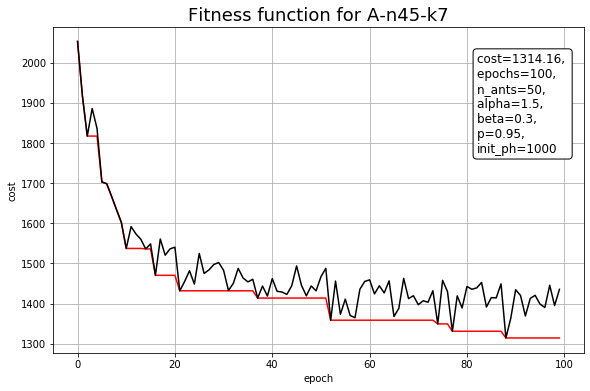

In [5]:
case.plot_function()

### Поиск всех решений

Теперь для каждого примера задачи запустим алгоритм с разными значениями параметров.
Для каждого набора параметров высчитаем среднее время выполнения алгоритма (**mean_time**), покажем значение целевой функции для найденного решения (**cost**) и сравним с известным оптимальным значением.

Для данного эксперимента были взяты следующие **значения параметров**:  
* ***epochs*** = 100
* ***n_ants*** = {50, 100}
* ***alpha*** = {1.5}
* ***beta*** = {0.1, 0.3}
* ***rho*** = {0.95} 
* ***init_pher*** = {10, 1000}

#### Полученные результаты

In [12]:
df = pd.read_csv('./data/best_results.csv')
df.drop('Unnamed: 0', 1, inplace=True)
df

,case,epochs,n_ants,alpha,beta,rho,init_pher,mean_time,found_cost,opt_cost,error
0,A-n32-k5,100,100,1.5,0.3,0.95,1000,31.09020,840.7085,784.0,0.072332
1,A-n33-k5,100,50,1.5,0.3,0.95,1000,17.45445,759.7473,661.0,0.149391
2,A-n33-k6,100,100,1.5,0.3,0.95,1000,39.43280,824.0234,742.0,0.110544
3,A-n34-k5,100,100,1.5,0.1,0.95,1000,36.65715,865.7229,778.0,0.112754
4,A-n36-k5,100,100,1.5,0.1,0.95,1000,37.42615,941.0480,799.0,0.177782
5,A-n37-k5,100,100,1.5,0.3,0.95,1000,34.72325,827.0217,669.0,0.236206
6,A-n37-k6,100,100,1.5,0.3,0.95,1000,45.17420,1098.5397,949.0,0.157576
7,A-n38-k5,100,100,1.5,0.3,0.95,1000,41.60640,831.4388,730.0,0.138957
8,A-n39-k5,100,100,1.5,0.3,0.95,1000,42.30030,922.5199,822.0,0.122287
9,A-n39-k6,100,100,1.5,0.3,0.95,1000,47.43830,938.2681,831.0,0.129083


Лучшие решения, найденные нами, в [папке]().